## Introduction: 

This project compares several clustering methods by analyzing how well they work on diverse datasets.
Our key goals include figuring out how to choose appropriate pre-built clustering algorithms depending on dataset properties and desired results. We'll also go through how to optimize and test clustering algorithms for the best results. 

## Task: 

Select suitable clustering algorithms for each dataset based on their characteristics and desired outcomes. Apply the chosen algorithms, evaluate their performance using metrics, compare the results, and explore fine-tuning options to improve performance.

## Datasets: <br>
- The file  **small_Xydf.csv** is a two-dimensional dataset with 200 records.
- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records. 
- The file **large2_Xydf.csv** is another two-dimensional dataset with 3000 records, and characteristics different from the “large1” dataset.

They all include the columns X0, X1, and y.  The actual cluster number generated by the dataset generation technique is shown in the y column.


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs, make_moons
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix,classification_report
from time import process_time
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("small_Xydf.csv") #read_data
Small_Data= data.drop('Unnamed: 0',1)
Small_Data.head(200)

/var/folders/w3/vrxgjpjs12d8wgdvgvxp2b980000gn/T/ipykernel_10712/2955705252.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Small_Data= data.drop('Unnamed: 0',1)


X0        X1  y
0    -8.725226 -9.914383  2
1   -12.362349 -5.284858  1
2    -8.179872 -6.274891  2
3    -9.532723 -2.588246  1
4    -3.395447 -7.024462  2
..         ...       ... ..
195  -9.729616 -1.549239  1
196  -0.633700  3.810304  0
197  -3.002052  4.381161  0
198  -9.138660 -5.167345  1
199   0.143622  5.411479  0

[200 rows x 3 columns]

In [4]:
#Get count, mean, std, min, 25%, 50%, 75%, max
Small_Data.describe()


X0          X1           y
count  200.000000  200.000000  200.000000
mean    -6.115276   -2.479675    0.995000
std      3.917746    5.538543    0.817506
min    -15.583883  -13.718297    0.000000
25%     -9.071355   -6.729384    0.000000
50%     -6.982269   -4.126616    1.000000
75%     -2.517895    3.061533    2.000000
max      2.711591    8.607000    2.000000

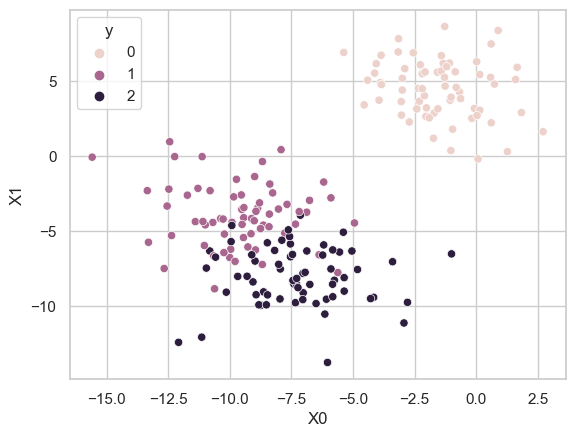

In [10]:
#Scatterplot of the given data
g =sns.scatterplot(x="X0", y="X1",hue="y", data=Small_Data); 

## Evaluate the small dataset using the K-Means algorithm.


To calculate the true within-cluster sum of squares (WSS), between-cluster sum of squares (BSS), and total sum of squares (SSE = WSS + BSS) from given true clusters (from column y in the original data),


In [6]:
def WSS_BSS(Dataframe, predicted):
    # Centroids calculation 
    clusters = Dataframe[predicted].unique()
    
    centroids_dict = {}
    rows = []
    WSS = 0
    WSS_0 = 0.0
    
    for i in clusters:
        # Calculate centroid for each cluster
        X0 = Dataframe[Dataframe[predicted] == i].X0.mean()
        X1 = Dataframe[Dataframe[predicted] == i].X1.mean()
        rows.append([i, X0, X1])
        
    centroids = pd.DataFrame(rows, columns=["Cluster", "X0", "X1"])    
    
    # WSS calculation
    for acluster in clusters:
        WSS_0 = 0.0
        for index, row in Dataframe[Dataframe[predicted] == acluster].iterrows():
            # Compute squared Euclidean distance for each data point within the cluster
            WSS_0 += ((row.X0 - centroids[centroids['Cluster'] == acluster].X0)**2) + ((row.X1 - centroids[centroids['Cluster'] == acluster].X1)**2)
        WSS = WSS + WSS_0.values
    
    print("WSS: ",round(WSS[0],3))   
    
    
    # BSS calculation
    centroid_overall = centroids[['X0', 'X1']].mean()
    BSS = 0
    
    for acluster in clusters:
        BSS_0 = 0.0
        BSS_0 = len(Dataframe[Dataframe[predicted] == acluster]) * ((centroid_overall.X0 - centroids[centroids['Cluster'] == acluster].X0)**2 + (centroid_overall.X1 - centroids[centroids['Cluster'] == acluster].X1)**2)
        BSS = BSS + BSS_0.values
        
    print("BSS: ",round(BSS[0],3))
    
    SSE = WSS + BSS
    print("SSE: ",round(SSE[0],3))


In [7]:
WSS_BSS(Small_Data,'y')

WSS:  1506.532
BSS:  7652.439
SSE:  9158.971


## Run the SciKitLearn K-Means Algorithm after configuring it.


<AxesSubplot:xlabel='X0', ylabel='X1'>

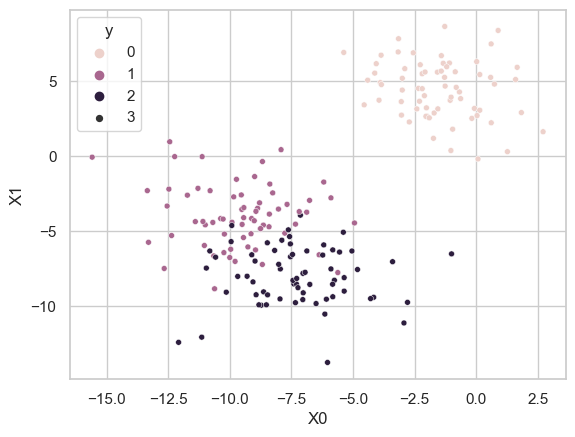

In [9]:
sns.set(style='whitegrid')
sns.scatterplot(data=data,x="X0", y="X1", hue="y",size= 3)

## For k=2

In [11]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time = process_time()
kmeans.fit(Small_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 3.504969
Time Processed: 0.1143320000000001


In [12]:
Small_Data['Predection_1']=kmeans.labels_
Small_Data.head(200)

X0        X1  y  Predection_1
0    -8.725226 -9.914383  2             1
1   -12.362349 -5.284858  1             1
2    -8.179872 -6.274891  2             1
3    -9.532723 -2.588246  1             1
4    -3.395447 -7.024462  2             1
..         ...       ... ..           ...
195  -9.729616 -1.549239  1             1
196  -0.633700  3.810304  0             0
197  -3.002052  4.381161  0             0
198  -9.138660 -5.167345  1             1
199   0.143622  5.411479  0             0

[200 rows x 4 columns]

In [13]:
WSS_BSS(Small_Data,'Predection_1')


WSS:  2222.185
BSS:  7784.345
SSE:  10006.53


<AxesSubplot:xlabel='X0', ylabel='X1'>

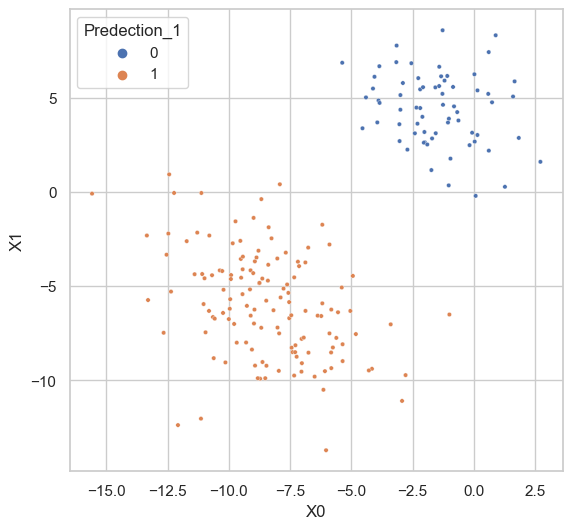

In [14]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Small_Data, x = 'X0', y = 'X1', hue = 'Predection_1',  ax= ax1, s=10)

## For k=3

In [15]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time1 = process_time()
kmeans.fit(Small_Data)
stop_time1 = process_time()
print("START TIME",start_time1)
print("Time Processed:",stop_time1-start_time1)

START TIME 5.395222
Time Processed: 0.0695199999999998


In [16]:
Small_Data['Predection_2']=kmeans.labels_
Small_Data.head(200)

X0        X1  y  Predection_1  Predection_2
0    -8.725226 -9.914383  2             1             2
1   -12.362349 -5.284858  1             1             1
2    -8.179872 -6.274891  2             1             2
3    -9.532723 -2.588246  1             1             1
4    -3.395447 -7.024462  2             1             2
..         ...       ... ..           ...           ...
195  -9.729616 -1.549239  1             1             1
196  -0.633700  3.810304  0             0             0
197  -3.002052  4.381161  0             0             0
198  -9.138660 -5.167345  1             1             1
199   0.143622  5.411479  0             0             0

[200 rows x 5 columns]

In [17]:
WSS_BSS(Small_Data,'Predection_2')


WSS:  1368.752
BSS:  7796.206
SSE:  9164.958


<AxesSubplot:xlabel='X0', ylabel='X1'>

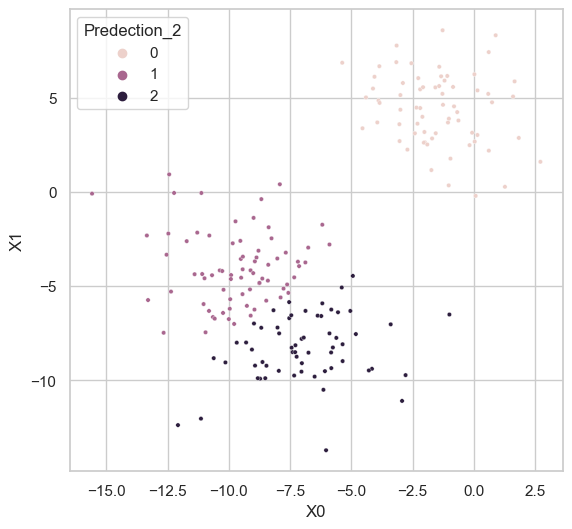

In [18]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Small_Data, x = 'X0', y = 'X1', hue = 'Predection_2',  ax= ax1, s=10)

In [19]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time2 = process_time()
kmeans.fit(Small_Data)
stop_time2 = process_time()
print("START TIME",start_time2)
print("Time Processed:",stop_time2-start_time2)

START TIME 7.002869
Time Processed: 0.10355800000000048


In [20]:
Small_Data['Predection_3']=kmeans.labels_
Small_Data.head(200)

X0        X1  y  Predection_1  Predection_2  Predection_3
0    -8.725226 -9.914383  2             1             2             3
1   -12.362349 -5.284858  1             1             1             2
2    -8.179872 -6.274891  2             1             2             3
3    -9.532723 -2.588246  1             1             1             2
4    -3.395447 -7.024462  2             1             2             0
..         ...       ... ..           ...           ...           ...
195  -9.729616 -1.549239  1             1             1             2
196  -0.633700  3.810304  0             0             0             1
197  -3.002052  4.381161  0             0             0             1
198  -9.138660 -5.167345  1             1             1             2
199   0.143622  5.411479  0             0             0             1

[200 rows x 6 columns]

In [21]:
WSS_BSS(Small_Data,'Predection_3')


WSS:  1159.029
BSS:  8331.651
SSE:  9490.68


<AxesSubplot:xlabel='X0', ylabel='X1'>

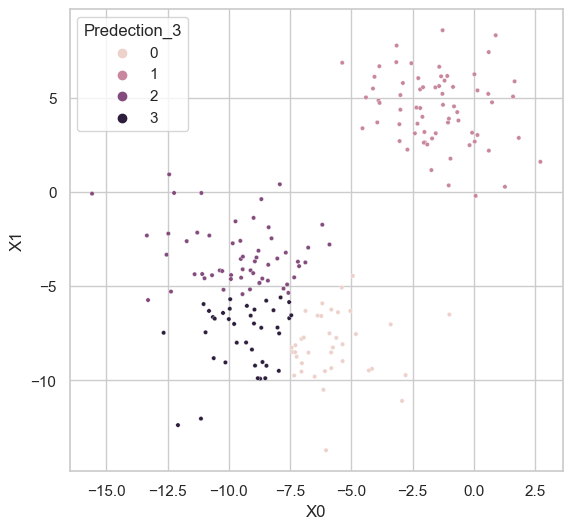

In [22]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Small_Data, x = 'X0', y = 'X1', hue = 'Predection_3',  ax= ax1, s=10)

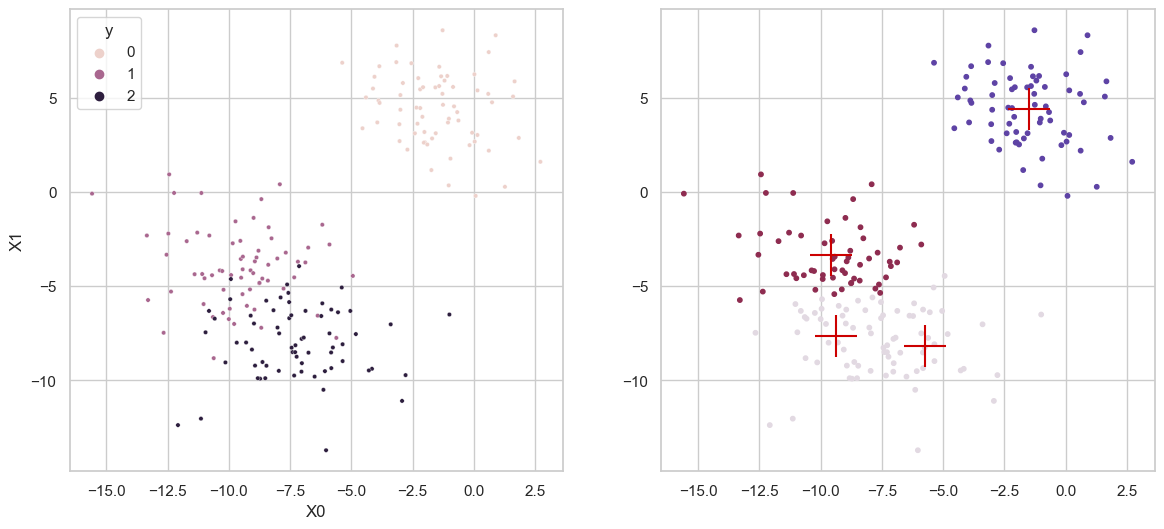

In [38]:
#for k=3, comparing true clusters with the clusters made by my algoithm side by side
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Small_Data, x = 'X0', y = 'X1', hue = 'y',  ax= ax1, s=10)

ax2 = fig.add_subplot(122)
ax2.scatter(Small_Data.X0, Small_Data.X1, cmap='twilight', s=10, c=kmeans.labels_)
ax2.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', lw=0, mew=1.5, ms=30, c='#cc0000')
plt.show()

In [39]:
def Assignment(data, coll,colCheck,n):
    temp='temp'+str(n)
    for j in range (len(coll)):
        data.loc[(data[colCheck]== coll[j],temp)]=j

In [40]:
#CrossTab Matrix Calculation 
CrossTab_Small=pd.crosstab(Small_Data['y'],Small_Data['Predection_2'])
row,column = linear_sum_assignment(CrossTab_Small, maximize= True) # 
print(column)
CrossTab_Small

[0 1 2]


Predection_2   0   1   2
y                       
0             67   0   0
1              0  62   5
2              0  11  55

In [41]:
Assignment(Small_Data, column , 'Predection_2',3)
CrossTab_Small=pd.crosstab(Small_Data['y'],Small_Data['Predection_2'])
CrossTab_Small

Predection_2   0   1   2
y                       
0             67   0   0
1              0  62   5
2              0  11  55

In [42]:
print(classification_report(Small_Data['y'].values.tolist(),Small_Data['Predection_2'].values.tolist()))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.85      0.93      0.89        67
           2       0.92      0.83      0.87        66

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200




The k-means algorithm produces different results for different values of k, especially when dealing with small datasets. The quality of the output can be evaluated based on metrics such as the within-cluster sum of squares (WSS) and between-cluster sum of squares (BSS). Generally, a smaller WSS indicates a better output.

In our case, we observed the following metrics for different values of k:

For k = 2: WSS = 2222.185, BSS = 7784.345, SSE = 10006.53
For k = 3: WSS = 1368.752, BSS = 7796.206, SSE = 9164.958
For k = 4: WSS = 1159.029, BSS = 8331.651, SSE = 9490.68
Based on these results, it appears that k = 3 provides a more efficient output. Notably, the number of clusters aligns with the actual clusters in the data. By considering these factors, we can classify the results and determine the optimal solution. Additionally, we can generate a classification report based on this optimal solution.

Overall, the k-means algorithm helps in identifying the most suitable number of clusters and provides insights into the data's structure, facilitating effective analysis and decision-making.

## Evaluate the K-Means Algorithm on the Large1 Dataset

In [43]:
data1 = pd.read_csv("large1_Xydf.csv") #read_data
Large1_Data= data1.drop('Unnamed: 0',1)
Large1_Data.head(3000)

/var/folders/w3/vrxgjpjs12d8wgdvgvxp2b980000gn/T/ipykernel_10712/3200843081.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Large1_Data= data1.drop('Unnamed: 0',1)


X0        X1  y
0    -9.726992  2.721249  7
1    -5.996252  7.593801  6
2    -9.952717  2.473725  7
3    -3.845438  2.406487  4
4    -6.735778 -1.920447  3
...        ...       ... ..
2995 -3.011239  4.074445  5
2996 -1.832417  0.997683  4
2997 -3.878350  7.829988  6
2998 -9.542672  4.500955  7
2999 -2.097592  0.482558  4

[3000 rows x 3 columns]

In [44]:
#Get count, mean, std, min, 25%, 50%, 75%, max

Large1_Data.describe()

X0           X1           y
count  3000.000000  3000.000000  3000.00000
mean     -5.485008     0.586703     3.50000
std       3.320716     4.999125     2.29167
min     -13.051477   -10.607120     0.00000
25%      -8.273889    -3.566535     1.75000
50%      -5.883705     1.929180     3.50000
75%      -2.219012     4.312663     5.25000
max       1.661519    10.279735     7.00000

In [45]:
Large1_Data['y'].unique()

array([7, 6, 4, 3, 1, 5, 2, 0])

## Calculate True Cluster Measures

In [48]:
WSS_BSS(Large1_Data,'y')

WSS:  5997.74
BSS:  102021.453
SSE:  108019.194


## Run the SciKitLearn K-Means Algorithm after configuring it.

<AxesSubplot:xlabel='X0', ylabel='X1'>

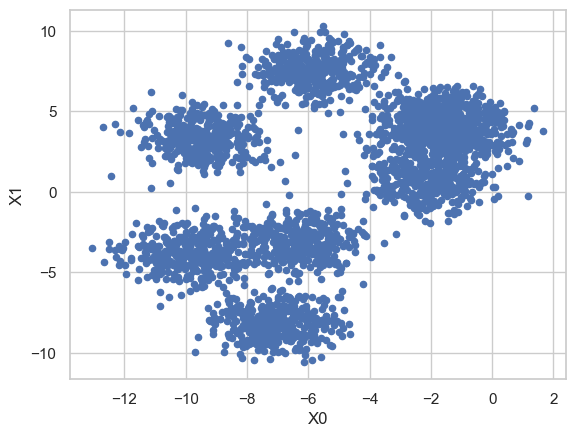

In [51]:
Large1_Data.plot(kind='scatter',x='X0',y='X1')

<AxesSubplot:xlabel='X0', ylabel='X1'>

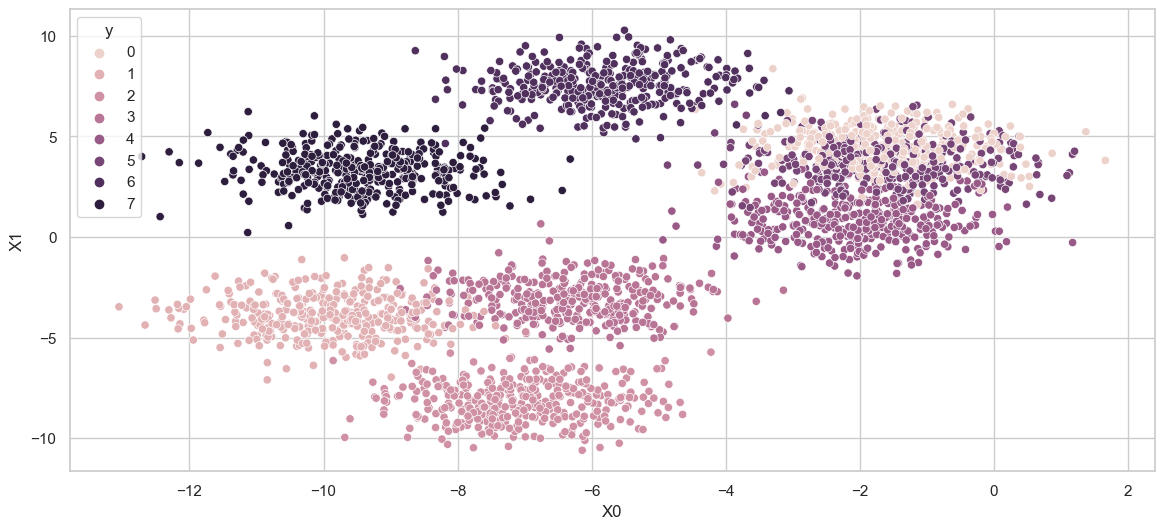

In [52]:
%matplotlib inline
fig = plt.figure(figsize=(14,6), dpi=100)
sns.scatterplot(data=Large1_Data,x="X0",
                    y="X1",
                    hue="y",legend='full')

## For k=6

In [53]:
Lkmeans1 = cluster.KMeans(init='k-means++', n_clusters=6, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time = process_time()
Lkmeans1.fit(Large1_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 15.808001
Time Processed: 0.2831489999999981


In [54]:
Large1_Data['Large1Predection_1']=Lkmeans1.labels_
Large1_Data.head(3000)

X0        X1  y  Large1Predection_1
0    -9.726992  2.721249  7                   3
1    -5.996252  7.593801  6                   4
2    -9.952717  2.473725  7                   3
3    -3.845438  2.406487  4                   5
4    -6.735778 -1.920447  3                   1
...        ...       ... ..                 ...
2995 -3.011239  4.074445  5                   5
2996 -1.832417  0.997683  4                   5
2997 -3.878350  7.829988  6                   4
2998 -9.542672  4.500955  7                   3
2999 -2.097592  0.482558  4                   5

[3000 rows x 4 columns]

In [55]:
WSS_BSS(Large1_Data,'Large1Predection_1')


WSS:  10157.166
BSS:  98416.195
SSE:  108573.361


<AxesSubplot:xlabel='X0', ylabel='X1'>

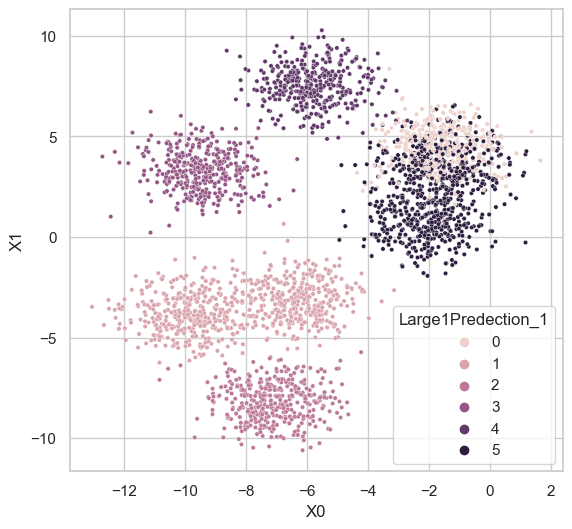

In [56]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Large1_Data, x = 'X0', y = 'X1', hue = 'Large1Predection_1',  ax= ax1, s=10,legend='full')

## For k=8

In [57]:
Lkmeans2 = cluster.KMeans(init='k-means++', n_clusters=8, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time = process_time()
Lkmeans2=Lkmeans2.fit(Large1_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 19.576945
Time Processed: 0.4561470000000014


In [58]:
Large1_Data['Large1Predection_2']=Lkmeans2.labels_
Large1_Data.head()

X0        X1  y  Large1Predection_1  Large1Predection_2
0 -9.726992  2.721249  7                   3                   2
1 -5.996252  7.593801  6                   4                   3
2 -9.952717  2.473725  7                   3                   2
3 -3.845438  2.406487  4                   5                   7
4 -6.735778 -1.920447  3                   1                   6

In [59]:
WSS_BSS(Large1_Data,'Large1Predection_2')

WSS:  5777.594
BSS:  102242.631
SSE:  108020.226


<AxesSubplot:xlabel='X0', ylabel='X1'>

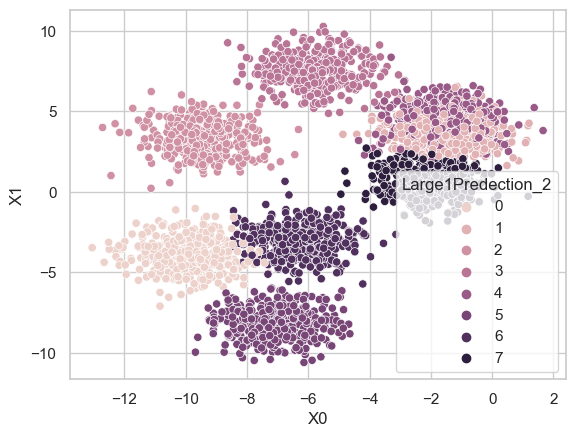

In [60]:
sns.scatterplot(x='X0',y='X1',hue='Large1Predection_2',data=Large1_Data,legend='full')

## For k=10

In [61]:
Lkmeans3 = KMeans(init='k-means++', n_clusters=10, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time = process_time()
Lkmeans3=Lkmeans3.fit(Large1_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 23.566788
Time Processed: 0.5460400000000014


In [62]:
Large1_Data['Large1Predection_3']=Lkmeans3.labels_
Large1_Data.head(3000)

X0        X1  y  Large1Predection_1  Large1Predection_2  \
0    -9.726992  2.721249  7                   3                   2   
1    -5.996252  7.593801  6                   4                   3   
2    -9.952717  2.473725  7                   3                   2   
3    -3.845438  2.406487  4                   5                   7   
4    -6.735778 -1.920447  3                   1                   6   
...        ...       ... ..                 ...                 ...   
2995 -3.011239  4.074445  5                   5                   1   
2996 -1.832417  0.997683  4                   5                   7   
2997 -3.878350  7.829988  6                   4                   3   
2998 -9.542672  4.500955  7                   3                   2   
2999 -2.097592  0.482558  4                   5                   7   

      Large1Predection_3  
0                      9  
1                      6  
2                      9  
3                      5  
4                      7  
...                  ...  
2995                   8  
2996                   5  
2997                   6  
2998                   0  
2999                   5  

[3000 rows x 6 columns]

In [63]:
WSS_BSS(Large1_Data,'Large1Predection_3')

WSS:  5264.931
BSS:  103739.934
SSE:  109004.865


<AxesSubplot:xlabel='X0', ylabel='X1'>

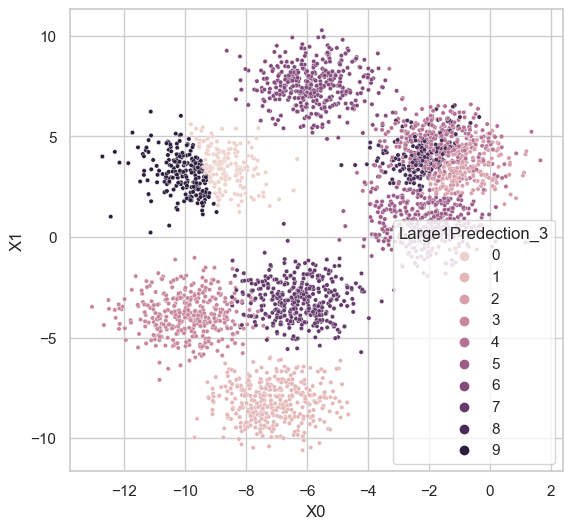

In [64]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Large1_Data, x = 'X0', y = 'X1', hue = 'Large1Predection_3',  ax= ax1, s=10,legend='full')

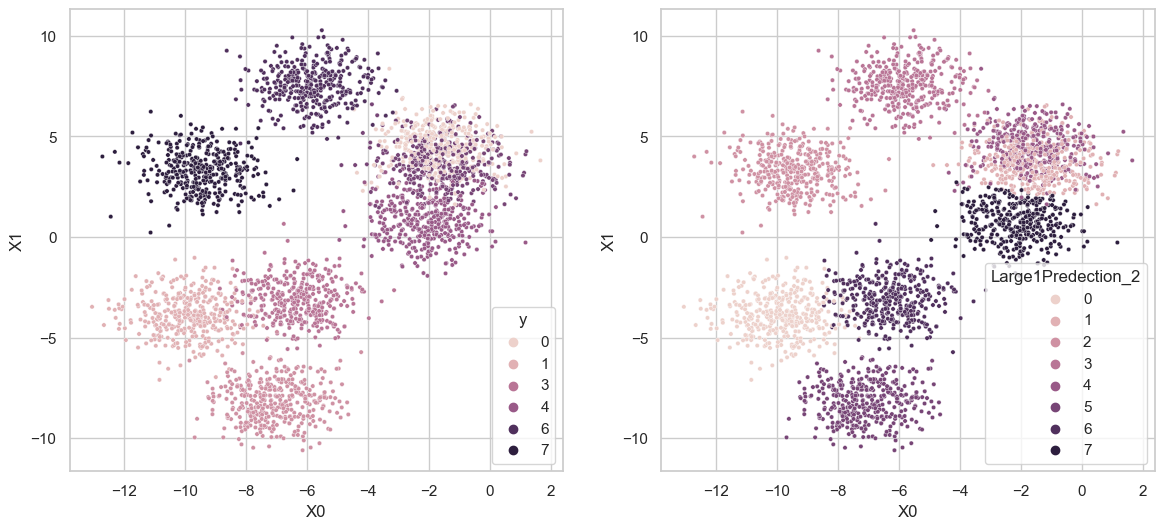

In [65]:
#for k=3, comparing true clusters with the clusters made by my algoithm side by side

fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Large1_Data, x = 'X0', y = 'X1', hue = 'y',  ax= ax1, s=10)

ax2 = fig.add_subplot(122)
sns.scatterplot(data = Large1_Data, x = 'X0', y = 'X1', hue = 'Large1Predection_2',  ax= ax2, s=10,legend='full')
plt.show()

In [66]:
#CrossTab Matrix Calculation 
CrossTab_Large=pd.crosstab(Large1_Data['y'],Large1_Data['Large1Predection_2'])
row,column = linear_sum_assignment(CrossTab_Large, maximize= True) # 
print(column)
CrossTab_Large

[4 0 5 6 7 1 3 2]


Large1Predection_2    0    1    2    3    4    5    6    7
y                                                         
0                     0    0    0    0  375    0    0    0
1                   373    0    0    0    0    2    0    0
2                     2    0    0    0    0  371    2    0
3                     4    0    0    0    0    0  371    0
4                     0   29    0    0    0    0    0  346
5                     0  355    0    3    0    0    0   17
6                     0    0    1  374    0    0    0    0
7                     0    0  375    0    0    0    0    0

In [67]:
Assignment(Large1_Data, column , 'Large1Predection_2',8)
CrossTab_Large1=pd.crosstab(Large1_Data['y'],Large1_Data['Large1Predection_2'])
CrossTab_Large1

Large1Predection_2    0    1    2    3    4    5    6    7
y                                                         
0                     0    0    0    0  375    0    0    0
1                   373    0    0    0    0    2    0    0
2                     2    0    0    0    0  371    2    0
3                     4    0    0    0    0    0  371    0
4                     0   29    0    0    0    0    0  346
5                     0  355    0    3    0    0    0   17
6                     0    0    1  374    0    0    0    0
7                     0    0  375    0    0    0    0    0

In [68]:
print(classification_report(Large1_Data['y'].values.tolist(),Large1_Data['Large1Predection_2'].values.tolist()))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     375.0
           1       0.00      0.00      0.00     375.0
           2       0.00      0.00      0.00     375.0
           3       0.00      0.00      0.00     375.0
           4       0.00      0.00      0.00     375.0
           5       0.00      0.00      0.00     375.0
           6       0.00      0.00      0.00     375.0
           7       0.00      0.00      0.00     375.0

    accuracy                           0.00    3000.0
   macro avg       0.00      0.00      0.00    3000.0
weighted avg       0.00      0.00      0.00    3000.0



The k-means algorithm generates varying results for different values of k, especially when applied to small datasets. These different values of k lead to distinct within-cluster sum of squares (WSS) and between-cluster sum of squares (BSS) values. In general, a smaller WSS indicates a better output.

In our specific case, we obtained the following metrics for different values of k:

For k = 6: WSS = 10157.166, BSS = 98416.195, SSE = 108573.361
For k = 8: WSS = 5777.594, BSS = 102242.631, SSE = 108020.226
For k = 10: WSS = 5264.931, BSS = 103739.934, SSE = 109004.865
Based on these results, it is evident that k = 8 yields a more efficient output. Notably, the number of clusters aligns with the true clusters present in the data. By taking these factors into consideration, we can classify the results and determine the optimal solution. Furthermore, by applying the optimal solution, we can generate a classification report.

Overall, the k-means algorithm plays a crucial role in determining the most suitable number of clusters and provides valuable insights into the underlying structure of the data, enabling effective analysis and decision-making.

##  Evaluate the K-Means Algorithm on the Large2 Dataset

In [69]:
data2 = pd.read_csv("large2_Xydf.csv") #read_data
Large2_Data= data2.drop('Unnamed: 0',1)
Large2_Data.head(3000)

/var/folders/w3/vrxgjpjs12d8wgdvgvxp2b980000gn/T/ipykernel_10712/2919944990.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Large2_Data= data2.drop('Unnamed: 0',1)


X0        X1  y
0     0.422710 -0.544382  1
1     0.750712 -0.316916  1
2    -1.052781  0.483709  0
3     0.035695  0.479169  1
4    -0.482704  0.358094  0
...        ...       ... ..
2995  1.676255 -0.202250  1
2996 -0.232984  1.014637  0
2997 -0.577190  0.799030  0
2998  0.980917  0.489829  0
2999 -0.624245  0.926909  0

[3000 rows x 3 columns]

In [70]:
Large2_Data.describe()

X0           X1            y
count  3000.000000  3000.000000  3000.000000
mean      0.503246     0.248808     0.500000
std       0.882553     0.516928     0.500083
min      -1.350034    -0.945252     0.000000
25%      -0.091082    -0.196193     0.000000
50%       0.502734     0.245097     0.500000
75%       1.108854     0.711275     1.000000
max       2.485960     1.432761     1.000000

In [71]:
Large2_Data['y'].unique()

array([1, 0])

In [72]:
WSS_BSS(Large2_Data,'y')

WSS:  1917.728
BSS:  1219.569
SSE:  3137.296


<AxesSubplot:xlabel='X0', ylabel='X1'>

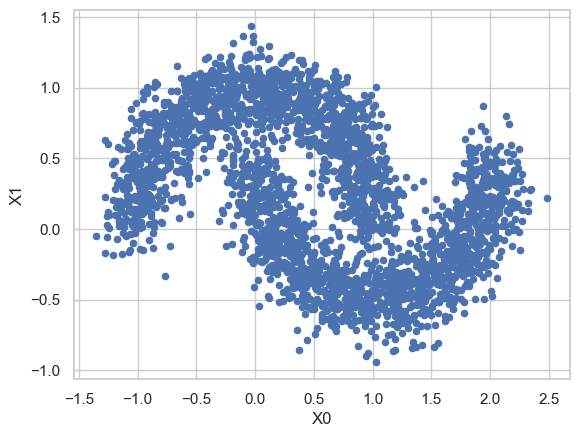

In [73]:
Large2_Data.plot(kind='scatter',x='X0',y='X1')

<AxesSubplot:xlabel='X0', ylabel='X1'>

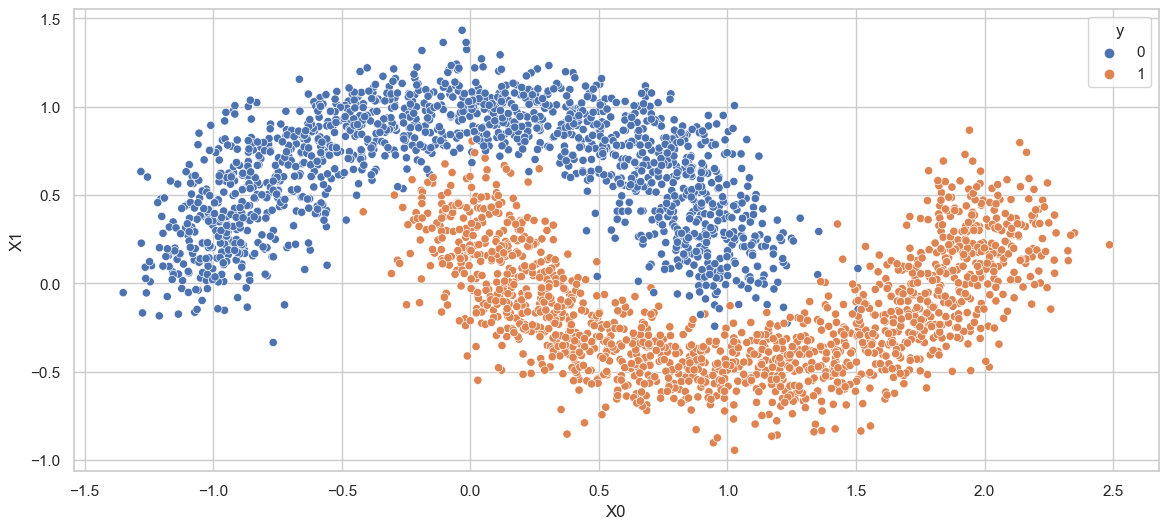

In [74]:
%matplotlib inline
fig = plt.figure(figsize=(14,6), dpi=100)
sns.scatterplot(data=Large2_Data,x="X0",
                    y="X1",
                    hue="y",legend='full')

In [75]:
L2kmeans1 = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time = process_time()
L2kmeans1=L2kmeans1.fit(Large2_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 30.472046
Time Processed: 0.32192500000000024


In [76]:
Large2_Data['Large2Predection_1']=L2kmeans1.labels_
Large2_Data.head(3000)

X0        X1  y  Large2Predection_1
0     0.422710 -0.544382  1                   0
1     0.750712 -0.316916  1                   0
2    -1.052781  0.483709  0                   1
3     0.035695  0.479169  1                   1
4    -0.482704  0.358094  0                   1
...        ...       ... ..                 ...
2995  1.676255 -0.202250  1                   0
2996 -0.232984  1.014637  0                   1
2997 -0.577190  0.799030  0                   1
2998  0.980917  0.489829  0                   0
2999 -0.624245  0.926909  0                   1

[3000 rows x 4 columns]

In [77]:
WSS_BSS(Large2_Data,'Large2Predection_1')

WSS:  1431.774
BSS:  1705.523
SSE:  3137.296


<AxesSubplot:xlabel='X0', ylabel='X1'>

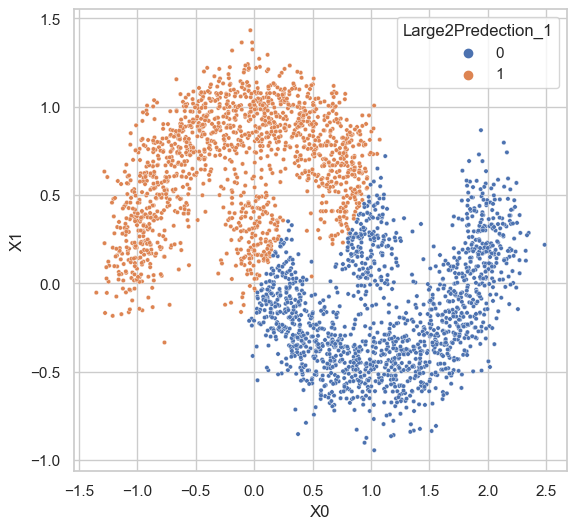

In [78]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'Large2Predection_1',  ax= ax1, s=10,legend='full')

In [79]:
L2kmeans2 = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time = process_time()
L2kmeans2=L2kmeans2.fit(Large2_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 34.135188
Time Processed: 0.26413300000000106


In [80]:
Large2_Data['Large2Predection_2']=L2kmeans2.labels_
Large2_Data.head(3000)

X0        X1  y  Large2Predection_1  Large2Predection_2
0     0.422710 -0.544382  1                   0                   0
1     0.750712 -0.316916  1                   0                   0
2    -1.052781  0.483709  0                   1                   1
3     0.035695  0.479169  1                   1                   1
4    -0.482704  0.358094  0                   1                   1
...        ...       ... ..                 ...                 ...
2995  1.676255 -0.202250  1                   0                   2
2996 -0.232984  1.014637  0                   1                   1
2997 -0.577190  0.799030  0                   1                   1
2998  0.980917  0.489829  0                   0                   0
2999 -0.624245  0.926909  0                   1                   1

[3000 rows x 5 columns]

In [81]:
WSS_BSS(Large2_Data,'Large2Predection_2')

WSS:  1019.246
BSS:  2374.449
SSE:  3393.695


<AxesSubplot:xlabel='X0', ylabel='X1'>

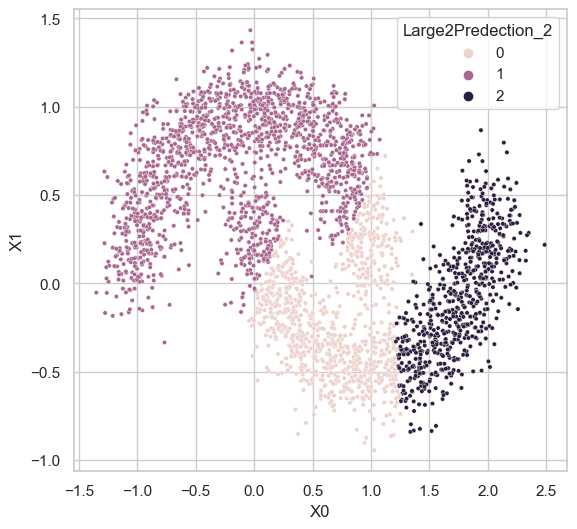

In [82]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'Large2Predection_2',  ax= ax1, s=10,legend='full')

In [105]:
L2kmeans3 = cluster.KMeans(init='k-means++', n_clusters=4, n_init=10,max_iter=300, 
    tol=1e-04, random_state=0)
start_time = process_time()
L2kmeans3=L2kmeans3.fit(Large2_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 47.956666
Time Processed: 0.17795800000000384


In [107]:
Large2_Data['Large2Predection_3']=L2kmeans3.labels_
Large2_Data.head(3000)

X0        X1  y  Large2Predection_1  Large2Predection_2  \
0     0.422710 -0.544382  1                   0                   0   
1     0.750712 -0.316916  1                   0                   0   
2    -1.052781  0.483709  0                   1                   1   
3     0.035695  0.479169  1                   1                   1   
4    -0.482704  0.358094  0                   1                   1   
...        ...       ... ..                 ...                 ...   
2995  1.676255 -0.202250  1                   0                   2   
2996 -0.232984  1.014637  0                   1                   1   
2997 -0.577190  0.799030  0                   1                   1   
2998  0.980917  0.489829  0                   0                   0   
2999 -0.624245  0.926909  0                   1                   1   

      Large2Predection_3  temp8  averagepre  
0                      0    1.0           1  
1                      0    1.0           1  
2                      3    5.0           0  
3                      1    5.0           0  
4                      3    5.0           0  
...                  ...    ...         ...  
2995                   2    7.0           0  
2996                   3    5.0           0  
2997                   3    5.0           0  
2998                   0    1.0           1  
2999                   3    5.0           0  

[3000 rows x 8 columns]

In [85]:
WSS_BSS(Large2_Data,'Large2Predection_3')

WSS:  607.502
BSS:  2529.809
SSE:  3137.311


<AxesSubplot:xlabel='X0', ylabel='X1'>

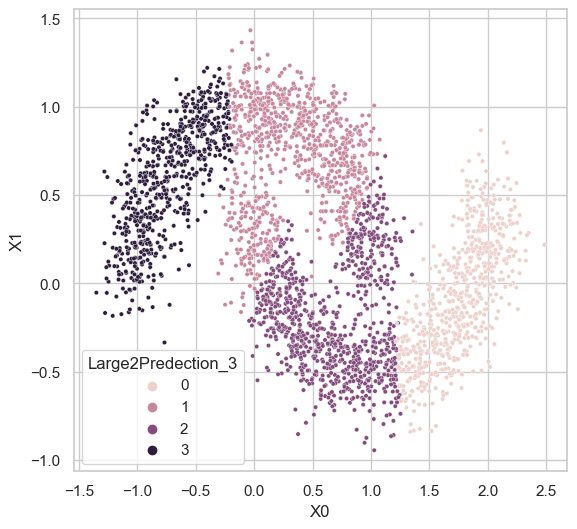

In [86]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'Large2Predection_3',  ax= ax1, s=10,legend='full')

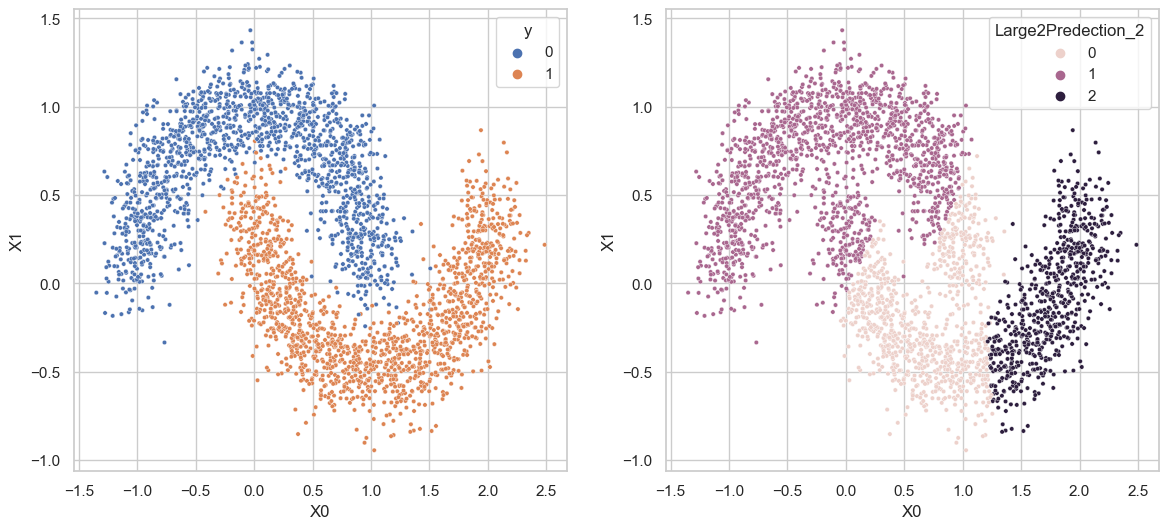

In [87]:
fig = plt.figure(figsize=(14,6), dpi=100)
ax1 = fig.add_subplot(121)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'y',  ax= ax1, s=10)

ax2 = fig.add_subplot(122)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'Large2Predection_2',  ax= ax2, s=10,legend='full')
plt.show()

In [88]:
#CrossTab Matrix Calculation 
CrossTab_Large2=pd.crosstab(Large2_Data['y'],Large2_Data['Large2Predection_2'])
row,columnn = linear_sum_assignment(CrossTab_Large, maximize= True) # 
print(column)
CrossTab_Large2

[4 0 5 6 7 1 3 2]


Large2Predection_2    0     1    2
y                                 
0                   196  1302    2
1                   661   198  641

In [89]:
Assignment(Large2_Data, columnn , 'Large2Predection_2',8)
CrossTab_Large2=pd.crosstab(Large2_Data['y'],Large2_Data['Large2Predection_2'])
CrossTab_Large2

Large2Predection_2    0     1    2
y                                 
0                   196  1302    2
1                   661   198  641

In [90]:
print(classification_report(Large2_Data['y'].values.tolist(),Large2_Data['Large2Predection_2'].values.tolist()))

              precision    recall  f1-score   support

           0       0.23      0.13      0.17      1500
           1       0.13      0.13      0.13      1500
           2       0.00      0.00      0.00         0

    accuracy                           0.13      3000
   macro avg       0.12      0.09      0.10      3000
weighted avg       0.18      0.13      0.15      3000



/Users/muskan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muskan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muskan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The k-means algorithm produces different results for different values of k, particularly when applied to small datasets. These different values of k lead to varying within-cluster sum of squares (WSS) and between-cluster sum of squares (BSS) values. Generally, a smaller WSS indicates a better output.

In our specific case, we obtained the following metrics for different values of k:

For k = 2: WSS = 1431.774, BSS = 1705.523, SSE = 3137.296
For k = 3: WSS = 1019.246, BSS = 2374.449, SSE = 3393.695
For k = 4: WSS = 607.502, BSS = 2529.809, SSE = 3137.311
Based on these results, it appears that k = 4 provides a more efficient output. Moreover, the number of clusters aligns with the true clusters present in the data. Depending on these factors, we can classify the results and consider the solution as optimum. Additionally, a classification report can be generated based on this optimal solution.

It is important to note that the optimal value of k may vary depending on the dataset and the desired outcome. In this case, the better output was achieved with a higher number of clusters. However, it is worth mentioning that k-means clustering is not considered an optimal method for all scenarios. One reason is that k-means is sensitive to initialization; different random starts can yield different clusterings, which may undermine confidence in any individual clustering obtained.

Overall, it is essential to carefully consider the data, the desired outcomes, and the limitations of k-means when applying clustering algorithms in practice.

## Evaluate Agglomerative Clustering on the Large2 Dataset

In [99]:
agglo = AgglomerativeClustering(linkage='average', n_clusters=2)
start_time = process_time()
agglo= agglo.fit(Large2_Data)

stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 44.840193
Time Processed: 0.14616000000000184


In [100]:
Large2_Data['averagepre']=agglo.labels_
Large2_Data.head()

X0        X1  y  Large2Predection_1  Large2Predection_2  \
0  0.422710 -0.544382  1                   0                   0   
1  0.750712 -0.316916  1                   0                   0   
2 -1.052781  0.483709  0                   1                   1   
3  0.035695  0.479169  1                   1                   1   
4 -0.482704  0.358094  0                   1                   1   

   Large2Predection_3  temp8  averagepre  
0                   2    1.0           1  
1                   2    1.0           1  
2                   3    5.0           0  
3                   1    5.0           0  
4                   3    5.0           0

In [93]:
WSS_BSS(Large2_Data,'averagepre')

WSS:  2848.738
BSS:  353.52
SSE:  3202.257


<AxesSubplot:xlabel='X0', ylabel='X1'>

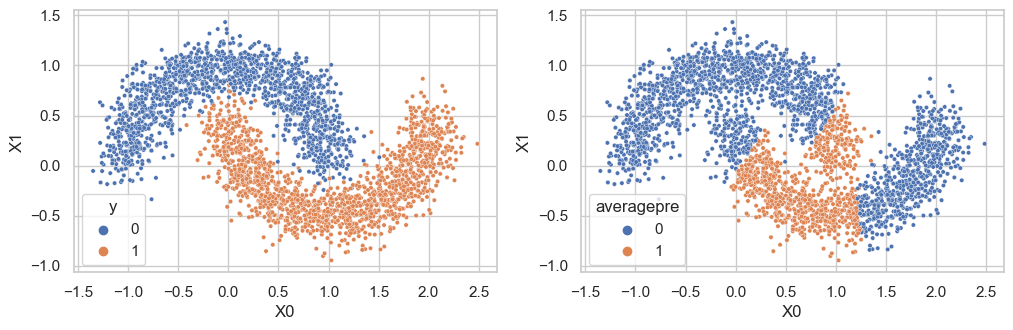

In [94]:
fig = plt.figure(figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(1,2,1, aspect=1.0)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'y', ax= ax1, s=10)

ax2 = fig.add_subplot(1,2,2, aspect=1.0)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'averagepre', ax= ax2, s=10)

In [95]:
#CrossTab Matrix Calculation 
CrossTab_Large5=pd.crosstab(Large2_Data['y'],Large2_Data['averagepre'])
row,columnn = linear_sum_assignment(CrossTab_Large5, maximize= True) # 
CrossTab_Large5

averagepre     0    1
y                    
0           1304  196
1            839  661

In [108]:
print(classification_report(Large2_Data['y'].values.tolist(),Large2_Data['averagepre'].values.tolist()))

              precision    recall  f1-score   support

           0       0.61      0.87      0.72      1500
           1       0.77      0.44      0.56      1500

    accuracy                           0.66      3000
   macro avg       0.69      0.66      0.64      3000
weighted avg       0.69      0.66      0.64      3000



In [109]:
wardf = AgglomerativeClustering(linkage='ward', n_clusters=2)
start_time = process_time()
wardf= wardf.fit(Large2_Data)
stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 49.509426
Time Processed: 0.14870100000000264


In [110]:
Large2_Data['averagepre']=wardf.labels_
Large2_Data.head()

X0        X1  y  Large2Predection_1  Large2Predection_2  \
0  0.422710 -0.544382  1                   0                   0   
1  0.750712 -0.316916  1                   0                   0   
2 -1.052781  0.483709  0                   1                   1   
3  0.035695  0.479169  1                   1                   1   
4 -0.482704  0.358094  0                   1                   1   

   Large2Predection_3  temp8  averagepre  
0                   0    1.0           1  
1                   0    1.0           1  
2                   3    5.0           0  
3                   1    5.0           0  
4                   3    5.0           0

In [112]:
WSS_BSS(Large2_Data,'averagepre')

WSS:  2848.738
BSS:  353.52
SSE:  3202.257


In [ ]:
fig = plt.figure(figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(1,2,1, aspect=1.0)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'y', ax= ax1, s=10)

ax2 = fig.add_subplot(1,2,2, aspect=1.0)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'wardpre', ax= ax2, s=10)

In [113]:
#CrossTab Matrix Calculation 
CrossTab_Large4=pd.crosstab(Large2_Data['y'],Large2_Data['averagepre'])
row,columnn = linear_sum_assignment(CrossTab_Large4, maximize= True) # 
CrossTab_Large4

averagepre     0    1
y                    
0           1304  196
1            839  661

In [114]:
print(classification_report(Large2_Data['y'].values.tolist(),Large2_Data['averagepre'].values.tolist()))


              precision    recall  f1-score   support

           0       0.61      0.87      0.72      1500
           1       0.77      0.44      0.56      1500

    accuracy                           0.66      3000
   macro avg       0.69      0.66      0.64      3000
weighted avg       0.69      0.66      0.64      3000



In [115]:
singf = AgglomerativeClustering(linkage='single', n_clusters=2)
start_time = process_time()
singf= singf.fit(Large2_Data)

stop_time = process_time()
print("START TIME",start_time)
print("Time Processed:",stop_time-start_time)

START TIME 51.5653
Time Processed: 0.07549600000000112


In [116]:
Large2_Data['singlepre']=singf.labels_
Large2_Data.head()

X0        X1  y  Large2Predection_1  Large2Predection_2  \
0  0.422710 -0.544382  1                   0                   0   
1  0.750712 -0.316916  1                   0                   0   
2 -1.052781  0.483709  0                   1                   1   
3  0.035695  0.479169  1                   1                   1   
4 -0.482704  0.358094  0                   1                   1   

   Large2Predection_3  temp8  averagepre  singlepre  
0                   0    1.0           1          1  
1                   0    1.0           1          1  
2                   3    5.0           0          0  
3                   1    5.0           0          0  
4                   3    5.0           0          0

In [117]:
WSS_BSS(Large2_Data,'singlepre')


WSS:  2848.738
BSS:  353.52
SSE:  3202.257


<AxesSubplot:xlabel='X0', ylabel='X1'>

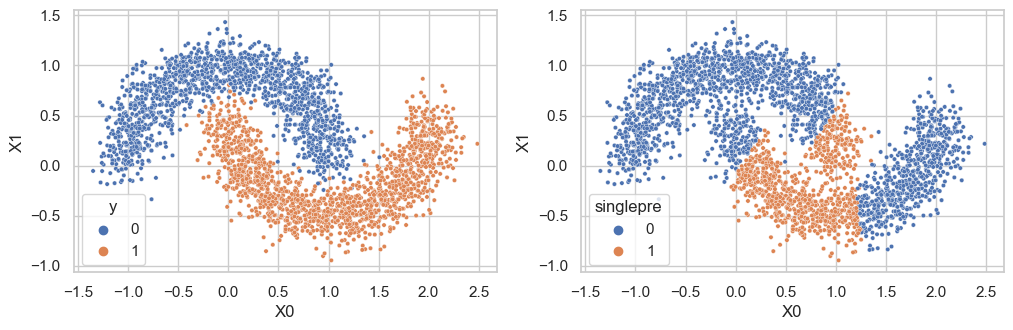

In [118]:
fig = plt.figure(figsize=(12,5), dpi=100)
ax1 = fig.add_subplot(1,2,1, aspect=1.0)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'y', ax= ax1, s=10)

ax2 = fig.add_subplot(1,2,2, aspect=1.0)
sns.scatterplot(data = Large2_Data, x = 'X0', y = 'X1', hue = 'singlepre', ax= ax2, s=10)

In [119]:
#CrossTab Matrix Calculation 
CrossTab_Large3=pd.crosstab(Large2_Data['y'],Large2_Data['singlepre'])
row,columnn = linear_sum_assignment(CrossTab_Large, maximize= True) # 
CrossTab_Large3

singlepre     0    1
y                   
0          1304  196
1           839  661

In [120]:
Assignment(Large2_Data, columnn , 'singlepre',8)
CrossTab_Large3=pd.crosstab(Large2_Data['y'],Large2_Data['singlepre'])
CrossTab_Large3

singlepre     0    1
y                   
0          1304  196
1           839  661

In [121]:
print(classification_report(Large2_Data['y'].values.tolist(),Large2_Data['singlepre'].values.tolist()))


              precision    recall  f1-score   support

           0       0.61      0.87      0.72      1500
           1       0.77      0.44      0.56      1500

    accuracy                           0.66      3000
   macro avg       0.69      0.66      0.64      3000
weighted avg       0.69      0.66      0.64      3000




One of the advantages of hierarchical clustering is its ability to capture clusters that follow the underlying manifold, rather than assuming they are strictly globular in shape. This flexibility allows for a more accurate representation of the data's structure. Additionally, hierarchical clustering can be computationally efficient, resulting in faster processing times compared to other clustering methods. Overall, hierarchical clustering often yields improved results compared to other analysis techniques. It's worth noting that the quality of the output is influenced by the choice of linkage method employed in the analysis. By leveraging these advantages, the output of hierarchical clustering tends to exhibit improved performance compared to traditional methods like k-means clustering.

## Conclusion
Clustering is a widely used analysis technique that aims to group data based on specific requirements, making it easier to analyze and interpret. The quality of clustering is determined by the level of similarity or homogeneity within each group and the distinct differences between the groups. It is important to note that clustering is a descriptive technique, and the optimal solution is not unique but depends on the chosen parameters.

In this analysis, various clustering algorithms were applied to the dataset to find the best results. This comprehensive approach provided a broader perspective and significantly enhanced the understanding of the data. 